In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def getImageRectangleSize(imagePath):
    #read image with grayscale
    image = cv2.imread(imagePath, 0)
    plt.imshow(image[::1], cmap='gray')
    plt.axis('off')
    plt.title(imagePath)
    plt.show()
    # Otsu's thresholding after Gaussian filtering
    #blur = cv2.GaussianBlur(image,(5,5),0)
    ret, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    plt.imshow(image[::1], cmap='gray')
    plt.axis('off')
    plt.title(imagePath)
    plt.show()
    cnts, _ = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    #print(len(cnts))
    
    show = np.zeros((image.shape[0], image.shape[1], 3), np.int8)
    cv2.drawContours(show, cnts, -1, (255, 0, 0), 10)
    maxContour = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(maxContour)
    cv2.rectangle(show, (x, y), (x+w, y+h), (0, 255, 0), 10)

    #show image
    plt.imshow(show)
    plt.axis('off')
    #plt.title(imagePath)
    plt.show()
    
    return w, h

# 87-91
# 92-95

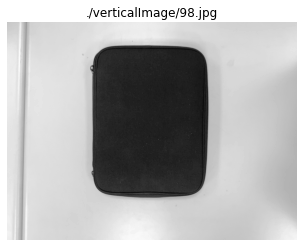

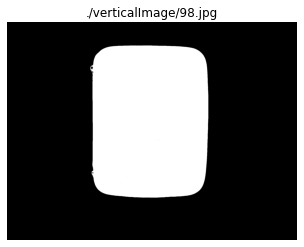

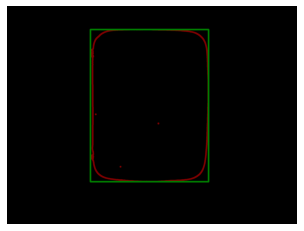

image height 1440
image width 1920
Object image height 1005
Object image width 782
Ratio X 0.40729166666666666
Ratio Y 0.6979166666666666


In [104]:
imagePath = './verticalImage/98.jpg'
objectImageWidth, objectImageHeight  = getImageRectangleSize(imagePath)
image = cv2.imread(imagePath)
height, width, channels = image.shape
print("image height {}".format(height))
print("image width {}".format(width))
print("Object image height {}".format(objectImageHeight))
print("Object image width {}".format(objectImageWidth))
print("Ratio X {}".format(objectImageWidth/width))
print("Ratio Y {}".format(objectImageHeight/height))

In [84]:
HFOV = 38.96411
VFOF = 51.95215
distance = 0.3358237445354461700


# Fit data to regression model

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
model = LinearRegression()
x_train = np.array([[0.340451926, 424], [0.429297835, 319],[0.369797379,370], [0.338584363,435],
                   [0.46855852,668],[0.307048589,817],[0.484556645, 642],[0.470655233, 668]])
y_train = np.array([90,90,90,90,200,200,200,200])
model.fit(x_train, y_train)

print(model.score)
'''[0.4653450548648834000, 796],'''
x_test = np.array([ [0.3902771472930908000, 772], [0.4412291944026947000, 782], [0.4412291944026947000, 1005]])

y_pred = model.predict(x_test)
print('Predict:',y_pred)
'''197'''
y_test = np.array([200,220,295])


print('Coefficients: \n', model.coef_)
#The intercept
print('Intercept:\n', model.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# Plot outputs
# plt.scatter(x_test, y_test,  color='black')
# plt.plot(x_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
Predict: [208.70963315 226.65730071 291.77594874]
Coefficients: 
 [2.94935133e+02 2.92011875e-01]
Intercept:
 -131.82997652752186
Mean squared error: 43.52
Coefficient of determination: 0.97


In [6]:
x_test = np.array([[0.23402540385723114, 656], [0.23402540385723114, 600]])
y_pred = model.predict(x_test)
print(y_pred)

[128.7521269  112.39946193]
